In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')

In [3]:
!pip install toml
import toml
from pathlib import Path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
path = Path("/content/drive/MyDrive/Datasets/metadata/emnist")

In [5]:
!cat {path/"metadata.toml"}

filename = 'matlab.zip'
sha256 = 'e1fa805cdeae699a52da0b77c2db17f6feb77eed125f9b45c022e7990444df95'
url = 'https://s3-us-west-2.amazonaws.com/fsdl-public-assets/matlab.zip'


# Download dataset

**TODO**:
* First check if installed
* Check SHA after dwonload

In [6]:
file_name_extractor = lambda path: split(path)[1]

In [7]:
metadata = toml.load(path/"metadata.toml")
metadata

{'filename': 'matlab.zip',
 'sha256': 'e1fa805cdeae699a52da0b77c2db17f6feb77eed125f9b45c022e7990444df95',
 'url': 'https://s3-us-west-2.amazonaws.com/fsdl-public-assets/matlab.zip'}

In [8]:
dataPath = path/metadata['filename'].split(".")[0]
if not dataPath.exists():
    !wget -O {path/metadata['filename']} {metadata['url']}
    !unzip {path/metadata['filename']} -d {path}
else:
    print("Data already downloaded")

Data already downloaded


# Read dataset

In [9]:
from scipy.io import loadmat

import json

In [10]:
import os
os.getcwd()

'/content'

In [13]:
data = loadmat(path/"matlab"/"emnist-byclass.mat")

with open("/content/drive/MyDrive/Datasets/metadata/emnist/emnist_essentials.json") as json_file:  
    mapping = json.load(json_file)["mapping"]
    mapping = {m[0]: m[1] for m in mapping}

data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Dec 18 07:27:57 2016',
 '__version__': '1.0',
 'dataset': array([[(array([[(array([[0, 0, 0, ..., 0, 0, 0],
                        [0, 0, 0, ..., 0, 0, 0],
                        [0, 0, 0, ..., 0, 0, 0],
                        ...,
                        [0, 0, 0, ..., 0, 0, 0],
                        [0, 0, 0, ..., 0, 0, 0],
                        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[35],
                        [36],
                        [ 6],
                        ...,
                        [ 5],
                        [11],
                        [22]], dtype=uint8), array([[2376],
                        [3994],
                        [3699],
                        ...,
                        [  26],
                        [ 421],
                        [1243]], dtype=uint16))                             ]],
               dtype=[('images', 'O'), ('labels', '

In [14]:
data["dataset"]

array([[(array([[(array([[0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       ...,
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[35],
                       [36],
                       [ 6],
                       ...,
                       [ 5],
                       [11],
                       [22]], dtype=uint8), array([[2376],
                       [3994],
                       [3699],
                       ...,
                       [  26],
                       [ 421],
                       [1243]], dtype=uint16))                             ]],
              dtype=[('images', 'O'), ('labels', 'O'), ('writers', 'O')]), array([[(array([[0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
        

In [15]:
data["dataset"][0]

array([(array([[(array([[0, 0, 0, ..., 0, 0, 0],
                      [0, 0, 0, ..., 0, 0, 0],
                      [0, 0, 0, ..., 0, 0, 0],
                      ...,
                      [0, 0, 0, ..., 0, 0, 0],
                      [0, 0, 0, ..., 0, 0, 0],
                      [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[35],
                      [36],
                      [ 6],
                      ...,
                      [ 5],
                      [11],
                      [22]], dtype=uint8), array([[2376],
                      [3994],
                      [3699],
                      ...,
                      [  26],
                      [ 421],
                      [1243]], dtype=uint16))                             ]],
             dtype=[('images', 'O'), ('labels', 'O'), ('writers', 'O')]), array([[(array([[0, 0, 0, ..., 0, 0, 0],
                      [0, 0, 0, ..., 0, 0, 0],
                      [0, 0, 0, ..., 0, 0, 0],
                      ...,
   

In [30]:
data["dataset"][1]

IndexError: ignored

In [16]:
data["dataset"][0][0]

(array([[(array([[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[35],
               [36],
               [ 6],
               ...,
               [ 5],
               [11],
               [22]], dtype=uint8), array([[2376],
               [3994],
               [3699],
               ...,
               [  26],
               [ 421],
               [1243]], dtype=uint16))                             ]],
      dtype=[('images', 'O'), ('labels', 'O'), ('writers', 'O')]), array([[(array([[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[18],
               [

In [31]:
data["dataset"][0][1]

IndexError: ignored

In [17]:
data["dataset"][0][0][0]

array([[(array([[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[35],
               [36],
               [ 6],
               ...,
               [ 5],
               [11],
               [22]], dtype=uint8), array([[2376],
               [3994],
               [3699],
               ...,
               [  26],
               [ 421],
               [1243]], dtype=uint16))                             ]],
      dtype=[('images', 'O'), ('labels', 'O'), ('writers', 'O')])

In [32]:
data["dataset"][0][0][1]

array([[(array([[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[18],
               [36],
               [ 0],
               ...,
               [28],
               [ 0],
               [ 5]], dtype=uint8), array([[ 464],
               [  12],
               [ 249],
               ...,
               [ 313],
               [ 512],
               [2497]], dtype=uint16))                             ]],
      dtype=[('images', 'O'), ('labels', 'O'), ('writers', 'O')])

In [33]:
data["dataset"][0][0][2]

array([[  0,  48],
       [  1,  49],
       [  2,  50],
       [  3,  51],
       [  4,  52],
       [  5,  53],
       [  6,  54],
       [  7,  55],
       [  8,  56],
       [  9,  57],
       [ 10,  65],
       [ 11,  66],
       [ 12,  67],
       [ 13,  68],
       [ 14,  69],
       [ 15,  70],
       [ 16,  71],
       [ 17,  72],
       [ 18,  73],
       [ 19,  74],
       [ 20,  75],
       [ 21,  76],
       [ 22,  77],
       [ 23,  78],
       [ 24,  79],
       [ 25,  80],
       [ 26,  81],
       [ 27,  82],
       [ 28,  83],
       [ 29,  84],
       [ 30,  85],
       [ 31,  86],
       [ 32,  87],
       [ 33,  88],
       [ 34,  89],
       [ 35,  90],
       [ 36,  97],
       [ 37,  98],
       [ 38,  99],
       [ 39, 100],
       [ 40, 101],
       [ 41, 102],
       [ 42, 103],
       [ 43, 104],
       [ 44, 105],
       [ 45, 106],
       [ 46, 107],
       [ 47, 108],
       [ 48, 109],
       [ 49, 110],
       [ 50, 111],
       [ 51, 112],
       [ 52,

In [38]:
data["dataset"][0][0][2][0]

array([ 0, 48], dtype=uint8)

In [18]:
data["dataset"][0][0][0][0]

array([(array([[0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              ...,
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[35],
              [36],
              [ 6],
              ...,
              [ 5],
              [11],
              [22]], dtype=uint8), array([[2376],
              [3994],
              [3699],
              ...,
              [  26],
              [ 421],
              [1243]], dtype=uint16))                             ],
      dtype=[('images', 'O'), ('labels', 'O'), ('writers', 'O')])

In [39]:
data["dataset"][0][0][0][1]

IndexError: ignored

In [19]:
data["dataset"][0][0][0][0][0]

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[35],
       [36],
       [ 6],
       ...,
       [ 5],
       [11],
       [22]], dtype=uint8), array([[2376],
       [3994],
       [3699],
       ...,
       [  26],
       [ 421],
       [1243]], dtype=uint16))

In [40]:
data["dataset"][0][0][0][0][1]

IndexError: ignored

In [20]:
data["dataset"][0][0][0][0][0][0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
data["dataset"][0][0][0][0][0][1]

array([[35],
       [36],
       [ 6],
       ...,
       [ 5],
       [11],
       [22]], dtype=uint8)

In [22]:
# load training dataset
x_train = data["dataset"][0][0][0][0][0][0]
x_train = x_train.astype(np.float32)

# load training labels
y_train = data["dataset"][0][0][0][0][0][1]

In [24]:
mapping

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'c',
 39: 'd',
 40: 'e',
 41: 'f',
 42: 'g',
 43: 'h',
 44: 'i',
 45: 'j',
 46: 'k',
 47: 'l',
 48: 'm',
 49: 'n',
 50: 'o',
 51: 'p',
 52: 'q',
 53: 'r',
 54: 's',
 55: 't',
 56: 'u',
 57: 'v',
 58: 'w',
 59: 'x',
 60: 'y',
 61: 'z'}

In [25]:
y_train[0]

array([35], dtype=uint8)

In [26]:
y_train[0].item()

35

In [28]:
mapping[35]

'Z'

Text(0.5, 1.0, 'label: Z')

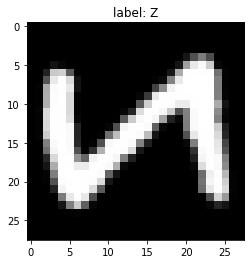

In [29]:
index = 0

plt.imshow(x_train[index].reshape(28, 28), cmap='gray')
plt.title(f"label: {mapping[y_train[index].item()]}")

In [41]:
# load test dataset
x_test = data["dataset"][0][0][1][0][0][0]
x_test = x_test.astype(np.float32)

# load test labels
y_test = data["dataset"][0][0][1][0][0][1]

In [43]:
type(x_test)

numpy.ndarray

In [44]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [42]:
# reshape using matlab order
x_train = x_train.reshape(-1, 28, 28, order="A")
x_test = x_test.reshape(-1, 28, 28, order="A")

In [45]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [48]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [49]:
x_train[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,
          4.,   4.,   4.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   1.,  34.,  84., 170., 173., 174.,
        217., 217., 217., 203., 129., 114.,  38.,  21.,   4.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  19., 201., 233., 251., 252., 252.,
        254., 254., 254., 254., 250., 245., 216., 172., 125.,  82.,  34.,
          1.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   8., 207., 253., 254., 254., 254.,
        254., 254., 254., 255., 255., 255., 254., 254., 254., 252., 243.,
        123.,  22.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [50]:
y_train

array([[35],
       [36],
       [ 6],
       ...,
       [ 5],
       [11],
       [22]], dtype=uint8)

In [51]:
y_train[0]

array([35], dtype=uint8)

Text(0.5, 1.0, 'label: Z')

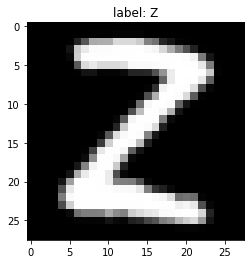

In [46]:
plt.imshow(x_train[index], cmap='gray')
plt.title(f"label: {mapping[y_train[index].item()]}")

In [47]:
x_train[index].shape

(28, 28)

# Explore the data

- How many iamges per class?
- Does the data need balancing?


In [52]:
number_of_classes = len(np.unique(y_train))
number_of_classes

62

In [54]:
from collections import Counter

labels_counter = Counter(list(map(int, y_train)))


In [55]:
labels_counter

Counter({0: 34585,
         1: 38374,
         2: 34203,
         3: 35143,
         4: 33535,
         5: 31416,
         6: 34232,
         7: 35754,
         8: 33946,
         9: 33847,
         10: 6407,
         11: 3878,
         12: 10094,
         13: 4562,
         14: 4934,
         15: 9182,
         16: 2517,
         17: 3152,
         18: 11946,
         19: 3762,
         20: 2468,
         21: 5076,
         22: 9002,
         23: 8237,
         24: 24983,
         25: 8347,
         26: 2605,
         27: 5073,
         28: 20764,
         29: 9820,
         30: 12602,
         31: 4637,
         32: 4695,
         33: 2771,
         34: 4743,
         35: 2701,
         36: 10033,
         37: 5159,
         38: 2854,
         39: 10177,
         40: 24631,
         41: 2561,
         42: 3687,
         43: 8738,
         44: 2725,
         45: 1896,
         46: 2491,
         47: 15318,
         48: 2645,
         49: 11418,
         50: 2749,
         51: 2448,
  

In [56]:
labels_counter = {mapping[k]: v for k, v in labels_counter.items()}
labels_counter

{'0': 34585,
 '1': 38374,
 '2': 34203,
 '3': 35143,
 '4': 33535,
 '5': 31416,
 '6': 34232,
 '7': 35754,
 '8': 33946,
 '9': 33847,
 'A': 6407,
 'B': 3878,
 'C': 10094,
 'D': 4562,
 'E': 4934,
 'F': 9182,
 'G': 2517,
 'H': 3152,
 'I': 11946,
 'J': 3762,
 'K': 2468,
 'L': 5076,
 'M': 9002,
 'N': 8237,
 'O': 24983,
 'P': 8347,
 'Q': 2605,
 'R': 5073,
 'S': 20764,
 'T': 9820,
 'U': 12602,
 'V': 4637,
 'W': 4695,
 'X': 2771,
 'Y': 4743,
 'Z': 2701,
 'a': 10033,
 'b': 5159,
 'c': 2854,
 'd': 10177,
 'e': 24631,
 'f': 2561,
 'g': 3687,
 'h': 8738,
 'i': 2725,
 'j': 1896,
 'k': 2491,
 'l': 15318,
 'm': 2645,
 'n': 11418,
 'o': 2749,
 'p': 2448,
 'q': 2994,
 'r': 14105,
 's': 2699,
 't': 18262,
 'u': 2830,
 'v': 2910,
 'w': 2697,
 'x': 2822,
 'y': 2365,
 'z': 2725}

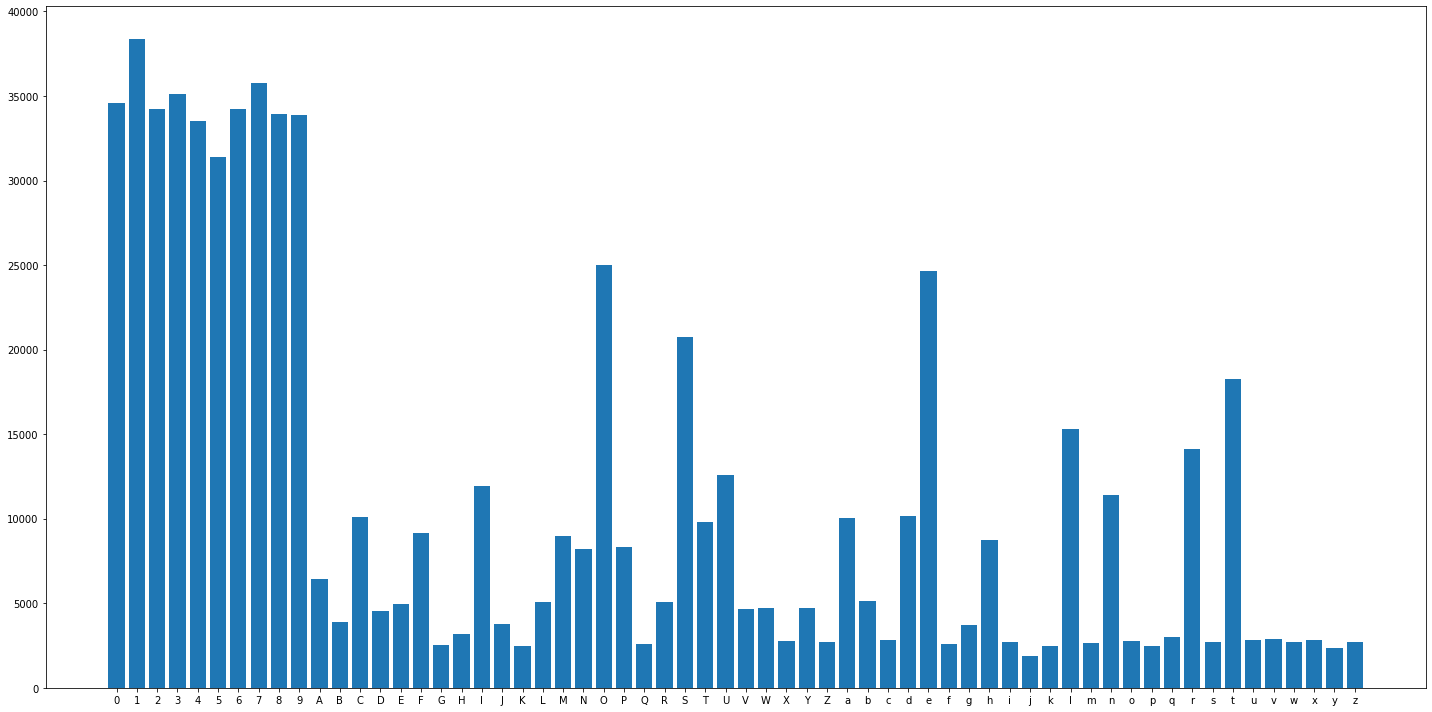

In [57]:
bars = list(map(str, labels_counter.keys()))
bars.sort()
counts = [labels_counter[bar] for bar in bars]

fig = plt.figure(figsize=(20, 10))

y_pos = np.arange(len(bars))
plt.bar(y_pos, counts)
plt.xticks(y_pos, bars)
fig.tight_layout()


In [58]:
min(counts)

1896

In [59]:
max(counts)

38374

In [60]:
int(np.mean(counts))

11256

# Balance data

In [61]:
def sample_to_balance(x, y):
    """Because the dataset is not balanced, we take at most the mean number of instances per class."""
    num_to_sample = int(np.bincount(y.flatten()).mean())
    print(f"num_to_sample :: {num_to_sample}")
    print("-------")
    
    all_sampled_inds = []
    for label in np.unique(y.flatten()):
        inds = np.where(y == label)[0]
        sampled_inds = np.unique(np.random.choice(inds, num_to_sample))
        print(f"label :: {mapping[label]}, sampled_inds :: {len(sampled_inds)}")
        all_sampled_inds.append(sampled_inds)
        
    ind = np.concatenate(all_sampled_inds)
    x_sampled = x[ind]
    y_sampled = y[ind]
    
    return x_sampled, y_sampled

In [ ]:
x, y = sample_to_balance(x_train, y_train)

num_to_sample :: 11256
-------
label :: 0, sampled_inds :: 9583
label :: 1, sampled_inds :: 9783
label :: 2, sampled_inds :: 9574
label :: 3, sampled_inds :: 9690
label :: 4, sampled_inds :: 9516
label :: 5, sampled_inds :: 9479
label :: 6, sampled_inds :: 9571
label :: 7, sampled_inds :: 9660
label :: 8, sampled_inds :: 9507
label :: 9, sampled_inds :: 9546
label :: A, sampled_inds :: 5270
label :: B, sampled_inds :: 3650
label :: C, sampled_inds :: 6745
label :: D, sampled_inds :: 4172
label :: E, sampled_inds :: 4428
label :: F, sampled_inds :: 6520
label :: G, sampled_inds :: 2495
label :: H, sampled_inds :: 3058
label :: I, sampled_inds :: 7308
label :: J, sampled_inds :: 3563
label :: K, sampled_inds :: 2443
label :: L, sampled_inds :: 4522
label :: M, sampled_inds :: 6458
label :: N, sampled_inds :: 6129
label :: O, sampled_inds :: 9090
label :: P, sampled_inds :: 6187
label :: Q, sampled_inds :: 2577
label :: R, sampled_inds :: 4500
label :: S, sampled_inds :: 8706
label :: T, 

In [ ]:
np.bincount(y.flatten())

array([9596, 9756, 9584, 9646, 9573, 9454, 9596, 9619, 9592, 9567, 5295,
       3676, 6776, 4161, 4434, 6470, 2485, 3069, 7326, 3585, 2448, 4527,
       6471, 6092, 9120, 6176, 2572, 4518, 8739, 6667, 7439, 4224, 4252,
       2723, 4280, 2657, 6779, 4551, 2802, 6828, 9042, 2531, 3496, 6337,
       2678, 1893, 2469, 7931, 2609, 7113, 2702, 2431, 2932, 7768, 2656,
       8388, 2774, 2860, 2652, 2766, 2345, 2682])

In [ ]:
int(np.mean(y))

25